# Introduction

In this lab, we will use random forest to evaluate the importance of features on an artificial classification task. We will generate a synthetic dataset with only 3 informative features. The feature importances of the forest will be plotted, along with their inter-trees variability represented by the error bars.

# Import Libraries

We will import the necessary libraries for this lab.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import time

# Generate Data

We will generate a synthetic dataset with only 3 informative features. We will explicitly not shuffle the dataset to ensure that the informative features will correspond to the three first columns of X. In addition, we will split our dataset into training and testing subsets.

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Fit Random Forest

We will fit a random forest classifier to compute the feature importances.

In [3]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Feature Importance based on Mean Decrease in Impurity

Feature importances are provided by the fitted attribute **feature_importances_** and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree. We will plot the impurity-based importance.

Elapsed time to compute the importances: 0.010 seconds


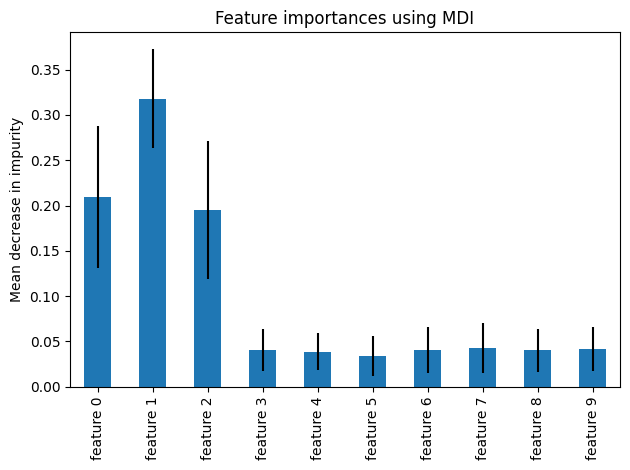

In [4]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Summary

In this lab, we generated a synthetic dataset with only 3 informative features and used random forest to evaluate the importance of features. We plotted the feature importances of the forest, along with their inter-trees variability represented by the error bars. We used impurity-based importance and feature permutation importance to compute the feature importances. The same features were detected as most important using both methods.